In [100]:
import requests
from dotenv import load_dotenv
import yfinance as yf
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
import panel as pn
import seaborn as sns
from panel.interact import interact
import matplotlib.pyplot as plt
from panel import widgets
import plotly.express as px
pn.extension("plotly")

import hvplot.pandas

In [2]:
load_dotenv()

True

In [3]:
def tickerGrab(ticker, period="5y"):
    symbol = yf.Ticker(ticker)
    symbol_hist = symbol.history(period=period)
    symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
    symbol_hist.to_csv(f"{ticker}_hist.csv")
    return symbol_hist

In [57]:
# sp500 stock data last 5-years
sp500 = tickerGrab(ticker="^GSPC")
sp500.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,2100.129883,2103.479980,2088.659912,2096.949951,4514410000
2016-06-01,2093.939941,2100.969971,2085.100098,2099.330078,3525170000
2016-06-02,2097.709961,2105.260010,2088.590088,2105.260010,3632720000
2016-06-03,2104.070068,2104.070068,2085.360107,2099.129883,3627780000
2016-06-06,2100.830078,2113.360107,2100.830078,2109.409912,3442020000


In [58]:
# nasdaq stock data last 5-years
nasdaq = tickerGrab(ticker="^IXIC")
nasdaq.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,4938.479980,4951.450195,4923.029785,4948.049805,2285350000
2016-06-01,4928.970215,4958.979980,4923.200195,4952.250000,1797090000
2016-06-02,4941.250000,4971.359863,4924.229980,4971.359863,1729050000
2016-06-03,4958.100098,4958.649902,4909.209961,4942.520020,1697840000
2016-06-06,4950.459961,4980.140137,4944.870117,4968.709961,1663840000


In [59]:
# total world market stock data last 5-years
msci_world = tickerGrab(ticker="MSCI")
msci_world.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,75.301909,75.595352,74.506763,75.529091,1220900
2016-06-01,75.065256,75.216708,74.487831,74.506760,683100
2016-06-02,74.364769,74.809671,74.203849,74.449966,827200
2016-06-03,73.825199,73.825199,72.925934,72.992195,1212100
2016-06-06,72.812368,73.588579,71.704850,73.228874,993200


In [34]:
sp500["Close"].head()

Date
2016-05-31    2096.949951
2016-06-01    2099.330078
2016-06-02    2105.260010
2016-06-03    2099.129883
2016-06-06    2109.409912
Name: Close, dtype: float64

In [35]:
sp500_close_price= sp500["Close"]
nasdaq_close_price=nasdaq["Close"]
msci_close_price=msci_world["Close"]

In [81]:
# Combined Portfolio

full_portfolio = pd.concat([sp500_close_price,nasdaq_close_price,msci_close_price,eth_close_price,bch_close_price,ltc_close_price,btc_close_price,ada_close_price,dash_close_price], axis="columns",join="inner")
full_portfolio.columns = ["SP500_Close","NASDAQ_Close","MSCI_Close","ETH_Close","BCH_Close","LTC_Close","BTC_Close","ADA_Close","DASH_Close"]
full_portfolio.head(5)

,SP500_Close,NASDAQ_Close,MSCI_Close,ETH_Close,BCH_Close,LTC_Close,BTC_Close,ADA_Close,DASH_Close
Date,,,,,,,,,
2017-10-02,2529.120117,6516.720215,112.523842,297.475006,421.186005,53.375999,4409.319824,0.025932,308.684998
2017-10-03,2534.580078,6531.709961,113.995552,292.463013,404.177002,52.349602,4317.479980,0.020816,296.234985
2017-10-04,2537.739990,6534.629883,115.563446,292.657990,358.446991,51.399502,4229.359863,0.021931,305.457001
2017-10-05,2552.070068,6585.359863,116.486870,295.863007,355.750000,51.669498,4328.410156,0.021489,305.398987
2017-10-06,2549.330078,6590.180176,116.660034,308.588013,363.014008,52.120098,4370.810059,0.018539,306.878998


In [60]:
# Merge Stock Data

merged_stock_data=pd.concat([sp500_close_price,nasdaq_close_price,msci_close_price], axis="columns",join="inner")
merged_stock_data.columns = ["SP500_Close","NASDAQ_Close","MSCI_Close"]
merged_stock_data.head(5)

,SP500_Close,NASDAQ_Close,MSCI_Close
Date,,,
2016-05-31,2096.949951,4948.049805,75.529091
2016-06-01,2099.330078,4952.250000,74.506760
2016-06-02,2105.260010,4971.359863,74.449966
2016-06-03,2099.129883,4942.520020,72.992195
2016-06-06,2109.409912,4968.709961,73.228874


In [61]:
ethereum = tickerGrab(ticker="ETH-USD")
ethereum.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-28,11.3332,12.3633,10.3734,11.8929,47274800
2016-05-29,12.1122,12.6908,11.7768,12.3504,28598400
2016-05-30,12.3253,12.8806,12.2658,12.7253,14733800
2016-05-31,12.7435,14.2673,12.6422,14.0773,42433400
2016-06-01,14.1098,14.3155,13.4389,14.0015,22471300


In [62]:
bitcoin_cash = tickerGrab(ticker="BCH-USD")
bitcoin_cash.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-23,555.885986,578.971008,411.776001,413.059998,85013
2017-07-24,412.579987,578.892029,409.210999,440.700989,190952
2017-07-25,441.345001,541.658020,338.091003,406.897003,524908
2017-07-26,407.082001,486.158997,321.791992,365.816010,1784640
2017-07-27,417.097992,460.968994,367.777008,385.479004,533207


In [63]:
litecoin = tickerGrab(ticker="LTC-USD")
litecoin.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-28,4.51095,4.83330,4.50653,4.70068,11564700
2016-05-29,4.68873,4.86499,4.57967,4.60962,7351420
2016-05-30,4.63264,4.70275,4.58507,4.67087,3805050
2016-05-31,4.68760,4.74944,4.60479,4.65039,5187600
2016-06-01,4.65329,4.77331,4.62104,4.74099,4577160


In [64]:
bitcoin = tickerGrab(ticker="BTC-USD")
bitcoin.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-28,473.028992,533.473022,472.699005,530.039978,181199008
2016-05-29,527.476990,553.960022,512.179016,526.232971,148736992
2016-05-30,528.471008,544.348999,522.963013,533.864014,87958704
2016-05-31,534.190979,546.617981,520.661987,531.385986,138450000
2016-06-01,531.106995,543.080017,525.635986,536.919983,86061800


In [65]:
cardano = tickerGrab(ticker="ADA-USD")
cardano.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-01,0.021678,0.032226,0.017354,0.024969,50068700
2017-10-02,0.024607,0.030088,0.019969,0.025932,57641300
2017-10-03,0.025757,0.027425,0.020690,0.020816,16997800
2017-10-04,0.020864,0.022806,0.020864,0.021931,9000050
2017-10-05,0.021951,0.022154,0.020859,0.021489,5562510


In [66]:
dash = tickerGrab(ticker="DASH-USD")
dash.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-28,7.46975,7.93757,7.40624,7.84946,367974
2016-05-29,7.84623,8.53344,7.76363,8.18925,400555
2016-05-30,8.19485,8.36470,8.11867,8.20357,212989
2016-05-31,8.18735,8.38751,7.98723,8.17684,341324
2016-06-01,8.17616,8.37368,8.08164,8.25982,320823


In [41]:
eth_close_price=ethereum["Close"]
bch_close_price=bitcoin_cash["Close"]
ltc_close_price=litecoin["Close"]
btc_close_price=bitcoin["Close"]
ada_close_price=cardano["Close"]
dash_close_price=dash["Close"]

In [67]:
# Merge Crypto Data

merged_crypto_df=pd.concat([eth_close_price,bch_close_price,ltc_close_price,btc_close_price,ada_close_price,dash_close_price], axis="columns",join="inner")
merged_crypto_df.columns = ["ETH_Close","BCH_Close","LTC_Close","BTC_Close","ADA_Close","DASH_Close"]
merged_crypto_df.head(10)

,ETH_Close,BCH_Close,LTC_Close,BTC_Close,ADA_Close,DASH_Close
Date,,,,,,
2017-10-01,302.337006,415.152008,54.543301,4403.740234,0.024969,315.802002
2017-10-02,297.475006,421.186005,53.375999,4409.319824,0.025932,308.684998
2017-10-03,292.463013,404.177002,52.349602,4317.479980,0.020816,296.234985
2017-10-04,292.657990,358.446991,51.399502,4229.359863,0.021931,305.457001
2017-10-05,295.863007,355.750000,51.669498,4328.410156,0.021489,305.398987
2017-10-06,308.588013,363.014008,52.120098,4370.810059,0.018539,306.878998
2017-10-07,311.123993,360.782013,52.584000,4426.890137,0.020941,310.492004
2017-10-08,308.608002,342.212006,53.142601,4610.479980,0.020477,302.484009
2017-10-09,297.391998,314.161011,50.164001,4772.020020,0.022114,283.665009


In [53]:
# Hvplot of Crypto and Stock Indeces portfolio

merged_crypto_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [121]:
# HvPlot of Crypto vs Stock Portfolio

full_portfolio.hvplot.box()

:BoxWhisker   [Variable]   (value)

In [54]:
merged_stock_data.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [122]:
# Full Portfolio Correlation and Hvplot

full_portfolio.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [89]:
portfolio_corr=full_portfolio.pct_change().corr()
portfolio_corr

,SP500_Close,NASDAQ_Close,MSCI_Close,ETH_Close,BCH_Close,LTC_Close,BTC_Close,ADA_Close,DASH_Close
SP500_Close,1.000000,0.948186,0.725964,0.222797,0.130029,0.185247,0.195554,0.152724,0.138551
NASDAQ_Close,0.948186,1.000000,0.743287,0.224236,0.125488,0.192281,0.201810,0.152981,0.138817
MSCI_Close,0.725964,0.743287,1.000000,0.141329,0.069342,0.126597,0.121839,0.088780,0.082695
ETH_Close,0.222797,0.224236,0.141329,1.000000,0.659750,0.763001,0.706125,0.544601,0.640656
BCH_Close,0.130029,0.125488,0.069342,0.659750,1.000000,0.608214,0.594521,0.422778,0.682847
LTC_Close,0.185247,0.192281,0.126597,0.763001,0.608214,1.000000,0.686450,0.507302,0.620013
BTC_Close,0.195554,0.201810,0.121839,0.706125,0.594521,0.686450,1.000000,0.496474,0.604108
ADA_Close,0.152724,0.152981,0.088780,0.544601,0.422778,0.507302,0.496474,1.000000,0.465931
DASH_Close,0.138551,0.138817,0.082695,0.640656,0.682847,0.620013,0.604108,0.465931,1.000000


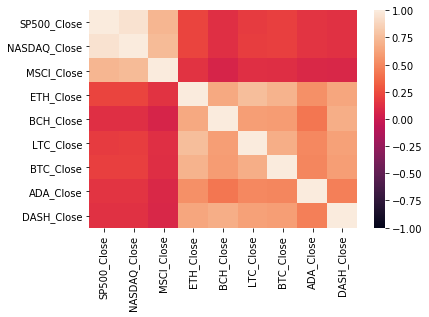

In [90]:
sns.heatmap(portfolio_corr, vmin=-1,vmax=1)

In [94]:
portfolio_annual_returns = full_portfolio.pct_change().mean() * 252
portfolio_annual_returns

SP500_Close     0.163991
NASDAQ_Close    0.235996
MSCI_Close      0.455537
ETH_Close       1.114791
BCH_Close       1.021615
LTC_Close       0.925192
BTC_Close       0.898515
ADA_Close       2.325314
DASH_Close      0.526796
dtype: float64

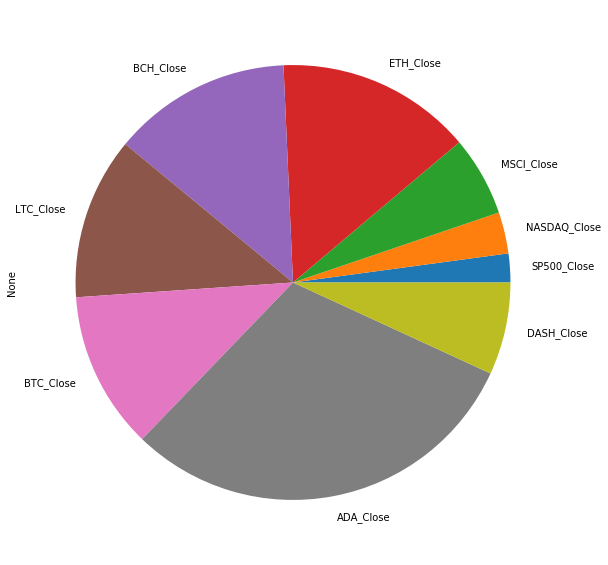

In [123]:
portfolio_annual_returns.plot(kind="pie", figsize=(20,10))

In [96]:
portfolio_daily_returns=full_portfolio.pct_change()

In [104]:
portfolio_daily_returns.rolling(window=200).std() * np.sqrt(200)
portfolio_daily_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [69]:
weights = [0.25,0.15,0.15,0.15,0.15,0.15]
portfolio_returns = crypto_daily_returns.dot(weights)
portfolio_returns.head()

Date
2017-10-01         NaN
2017-10-02   -0.002456
2017-10-03   -0.051921
2017-10-04   -0.009884
2017-10-05    0.002859
dtype: float64

In [71]:
initial_inv=25000

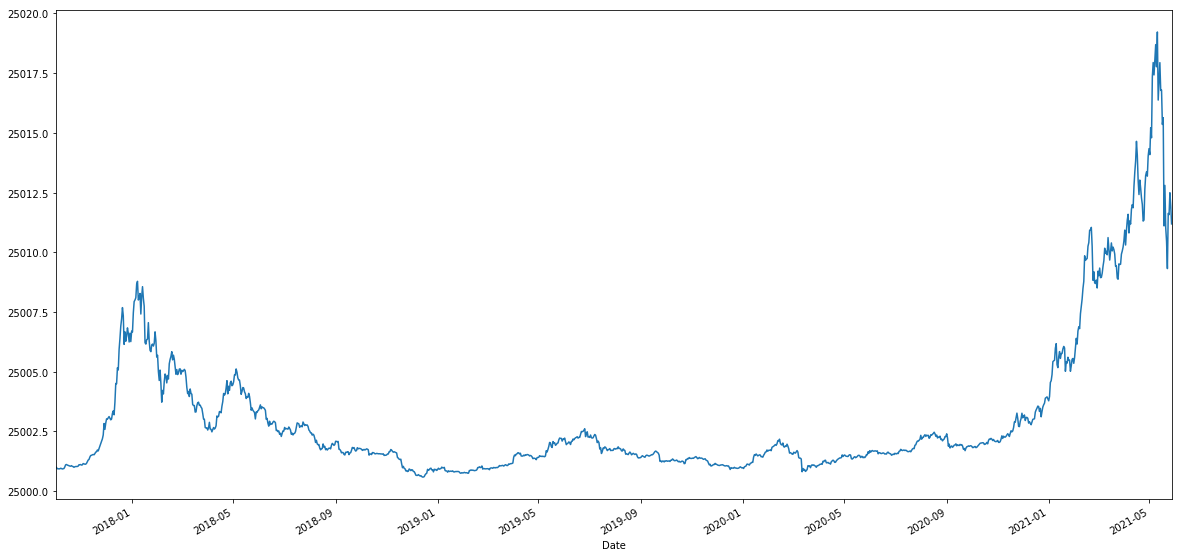

In [102]:
## Needs Cleaning
cumulative_profit = initial_inv + cumulative_returns
cumulative_profit.plot(figsize=(20,10))

In [119]:
# Crypto Daily Returns Correlation

crypto_correlation= crypto_daily_returns.corr()
crypto_correlation

,ETH_Close,BCH_Close,LTC_Close,BTC_Close,ADA_Close,DASH_Close
ETH_Close,1.000000,0.689266,0.795811,0.731982,0.563737,0.657786
BCH_Close,0.689266,1.000000,0.655268,0.599481,0.431419,0.651908
LTC_Close,0.795811,0.655268,1.000000,0.710193,0.510754,0.646489
BTC_Close,0.731982,0.599481,0.710193,1.000000,0.497972,0.576514
ADA_Close,0.563737,0.431419,0.510754,0.497972,1.000000,0.437552
DASH_Close,0.657786,0.651908,0.646489,0.576514,0.437552,1.000000


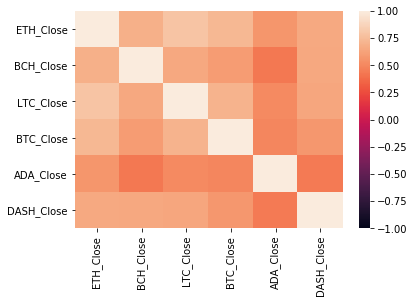

In [79]:
crypto_heatmap=sns.heatmap(correlation,vmin=-1, vmax=1)
crypto_heatmap

In [ ]:
merged_stock_data
merged_stock_data
full_portfolio

<function matplotlib.pyplot.legend(*args, **kwargs)>

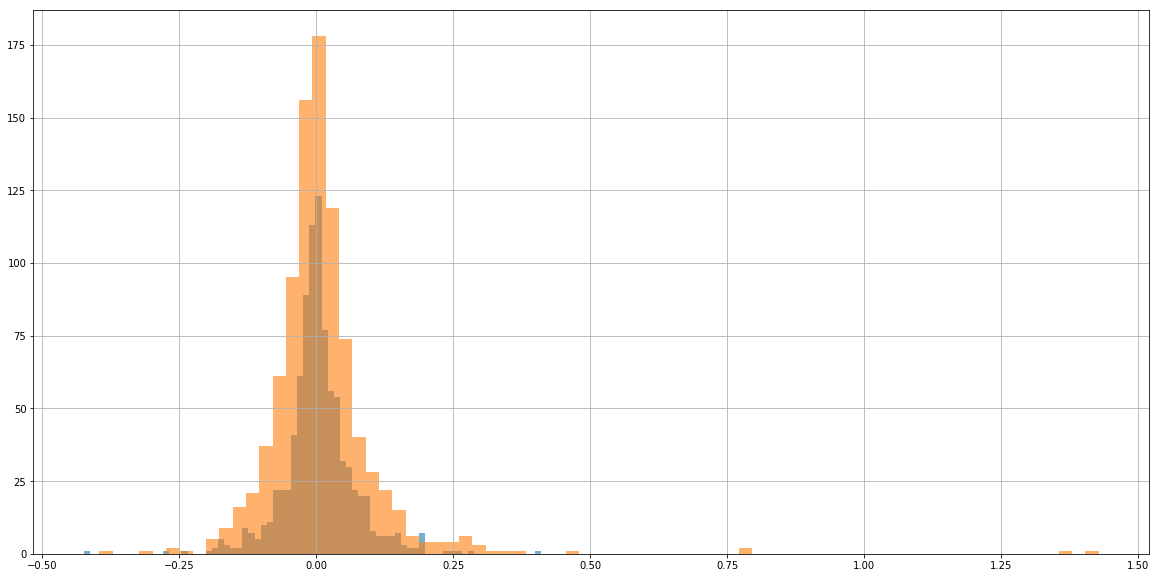

In [117]:
## Crypto (Ticker) vs Crypto (Ticker) / Ethereum (ETH) vs. Cardano (ADA)

eth_hist=portfolio_daily_returns["ETH_Close"].hist(label="Ethereum", figsize=(20,10), bins = 75, alpha = 0.6)
ada_hist=portfolio_daily_returns["ADA_Close"].hist(label="Cardano", figsize=(20,10), bins = 75, alpha = 0.6)
plt.legend